## Bayesian Analysis of 2020 Bundesliga Results

In [1]:
library("rstan")
library("parallel")
library("bayesplot")

Loading required package: StanHeaders


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)




ERROR: Error in library("bayesplot"): there is no package called ‘bayesplot’


In [2]:
example(stan_model, package = "rstan", run.dontrun = TRUE)


stn_md> stancode <- 'data {real y_mean;} parameters {real y;} model {y ~ normal(y_mean,1);}'

stn_md> mod <- stan_model(model_code = stancode, verbose = TRUE)

TRANSLATING MODEL '' FROM Stan CODE TO C++ CODE NOW.
OS: x86_64, linux-gnu; rstan: 2.26.13; Rcpp: 1.0.9; inline: 0.3.19 
 >> setting environment variables: 
PKG_LIBS =  '/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/rstan/lib//libStanServices.a' -L'/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/StanHeaders/lib/' -lStanHeaders -L'/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/RcppParallel/lib/' -ltbb 
PKG_CPPFLAGS =   -I"/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/Rcpp/include/"  -I"/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/RcppEigen/include/"  -I"/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/RcppEigen/include/unsupported"  -I"/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/BH/include" -I"/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/StanHeaders/include/src/"  -I"/home/drclab/R/x86_64-pc-linux-gnu-library/4.2/StanHeade

In [3]:
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')

In [4]:
getwd()

[1] "/home/drclab/Stan/Stan/Jupyter"

In [5]:
setwd("/mnt/d/Github/Stan/Stan")
remove(list = ls()) # clear the current work space

ERROR: Error in setwd("/mnt/d/Github/Stan/Stan"): cannot change working directory


In [8]:
HFA <- readRDS(file = paste('../',
    "/Data/Sorted_Bundesliga_2019_20.rds", sep = ""))

In [9]:
ngames <- nrow(HFA)
ngames

nteams <- length(unique(HFA$host))
nteams

HFA$COVID + 1

dl <- list(
  G = ngames,
  yh = HFA$HG,
  yv = HFA$VG,
  COV = HFA$COVID + 1,
  xh = HFA$host,
  xv = HFA$visitor,
  T = nteams
)

[1] 306

[1] 18

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2

In [11]:
remove(sm)
sm <- stan_model(paste('../', "/Models/Bundesliga2020.stan", sep = ""))

Warning message in remove(sm):
“object 'sm' not found”
hash mismatch so recompiling; make sure Stan code ends with a blank line



In [ ]:
# fit <- stan(
#   file = paste(getwd(), "/Models/Bundesliga2020.stan", sep = ""),  # Stan program
#   data = dl,    # named list of data
#   chains = 4,             # number of Markov chains
#   warmup = 1000,          # number of warmup iterations per chain
#   iter = 2000,            # total number of iterations per chain
#   cores = 2,              # number of cores (could use one per chain)
#   refresh = 1             # no progress shown
#   )

In [12]:
remove(fit)
fit <- sampling(object = sm,
                data = dl,
                init = "random",
                control = list(adapt_delta = 0.95),
                chains = 4,
                iter = 2000,
                warmup = 1500,
                thin = 1,
                verbose = TRUE)


CHECKING DATA AND PREPROCESSING FOR MODEL 'anon_model' NOW.

COMPILING MODEL 'anon_model' NOW.

STARTING SAMPLER FOR MODEL 'anon_model' NOW.


Warning message:
“There were 1 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”


In [ ]:
s <- summary(fit, pars = c("lambda_O_t"), prob=c(0.05, 0.5, 0.95))

In [ ]:
round(s$summary, 2)

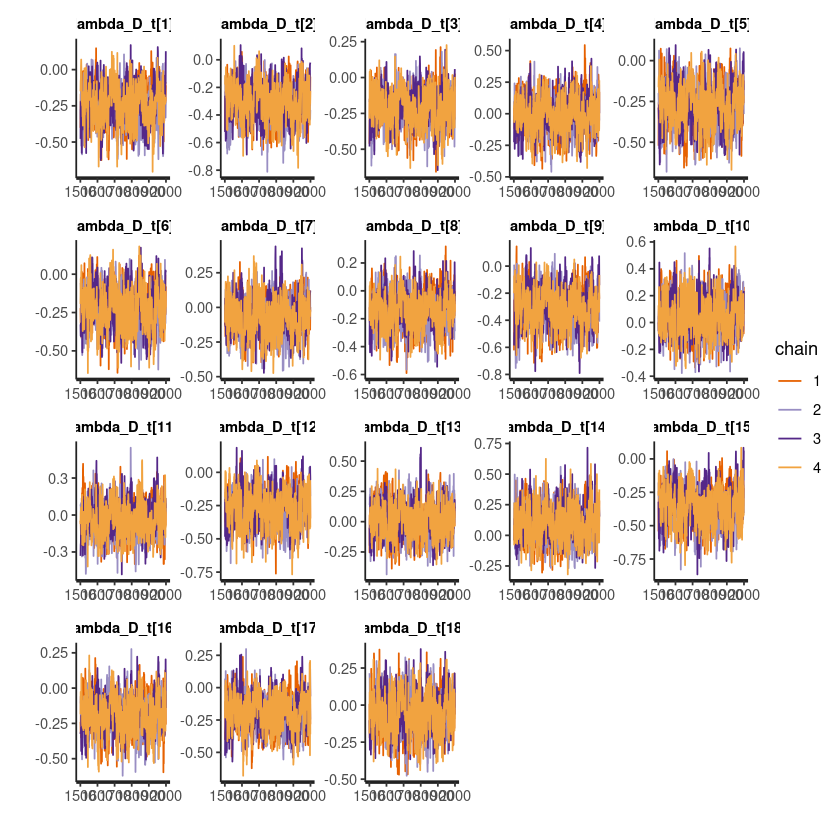

In [13]:
traceplot(fit, pars=c("lambda_D_t"))

In [ ]:
traceplot(fit, pars=c("lambda_O_t"))

In [ ]:
traceplot(fit, pars=c("mu_O", "mu_D", "sigma_O", "sigma_D"))

In [ ]:
theme_posterior <- theme(
    axis.line.x = element_line(arrow=arrow(length=unit(0.05, "cm")),
     lineend = "butt"),
    panel.background = element_rect(fill="transparent"),
    panel.border = element_rect(fill="transparent"),
    plot.background = element_rect(fill = "transparent"),
  #panel.spacing.y = unit(1,"lines"),
    plot.margin = unit(c(1,1,1,1), "cm"),
  #
    axis.title.y = element_blank(), 
    axis.text.y = element_text(color = "grey20",
      size = 8, angle = 0, hjust = 1, vjust = 0, face = "plain"),
    xis.text.x = element_text(color="grey20",
      hjust = 1, vjust=1, size=8, angle = 50, face = "plain"),
    axis.ticks.y = element_blank()
)

In [ ]:
plot(fit,
     pars = names(fit)[c(5, 6)],
     show_density = TRUE,
     fill_color = "#998811",
     est_color = "#ffffff",
     ci_level = 0.9, outer_level=0.95) +
     geom_vline(xintercept = 0, linetype = 3, size = 0.5)
     + theme_Posterior

In [ ]:
names(fit)

---

In [ ]:
color_scheme_set("green")

In [ ]:
mcmc = extract(fit)

In [ ]:
ppc_dens_overlay(y=as.numeric(HFA$HG - HFA$VG), yrep = mcmc$yp_H - mcmc$yp_V)

In [ ]:
ppc_ribbon(y=as.numeric(HFA$HG - HFA$VG), yrep = mcmc$yp_H - mcmc$yp_V)

In [ ]:
ppc_intervals(y=as.numeric(HFA$HG - HFA$VG), yrep = mcmc$yp_H - mcmc$yp_V, prob = 0.55, prob_outer = 0.95)